In [6]:

from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import tidetools
import seaborn as sns

from salishsea_tools import (nc_tools,viz_tools)

from salishsea_tools.nowcast import analyze, research_VENUS

import os
import glob
from matplotlib import animation

import datetime

%matplotlib inline

In [7]:
sns.set_style('whitegrid')

Define date range

In [8]:
start = datetime.datetime(2015,2,1)
end = datetime.datetime(2015,2,28)

numdays = (end-start).days
dates = [start + datetime.timedelta(days=num)
             for num in range(0, numdays+1)]

In [9]:
results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

Load files over date range

In [11]:
#subset
ist=299
ien=300
jst=350
jen=550
x=np.arange(ist,ien)
y=np.arange(jst,jen)
k=np.arange(0,40)

files = analyze.get_filenames(start,end,'1h','grid_T', results_home)
sal, times = analyze.combine_files(files,'vosaline',k,y,x )

tmp = nc.Dataset(files[0])
depth=tmp.variables['deptht'][:]

sal = np.ma.masked_values(sal,0)

print(sal.shape)

(672, 40, 200, 1)


/data/nsoontie/MEOPAR/tools/SalishSeaTools/salishsea_tools/nowcast/analyze.py:169: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


{'VENUS': {'Central': {'lat': 49.0401, 'depth': 300, 'j': 424, 'lon': -123.4261, 'i': 266}, 'ddl': {'lat': 49.0807167, 'depth': 150, 'j': 425, 'lon': -123.3400617, 'i': 284}, 'East': {'lat': 49.0419, 'depth': 170, 'j': 416, 'lon': -123.3176, 'i': 283}}, 'Vancouver': {'lat': 49.2827, 'lon': -123.1207}}


/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


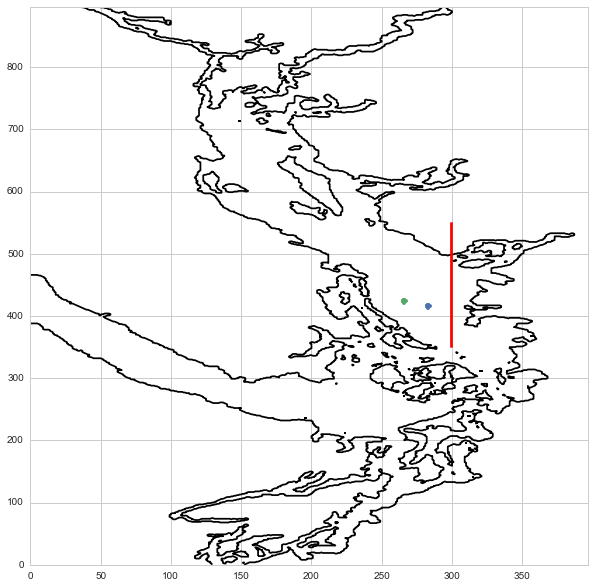

In [12]:
SITES = research_VENUS.SITES
print(SITES)
fig,ax=plt.subplots(1,1,figsize=(10,10))
viz_tools.plot_coastline(ax,bathy)
ax.plot([ist,ist], [jst,jen],'r')
ax.plot([ien,ien], [jst,jen],'r')
ax.plot(SITES['VENUS']['East']['i'], SITES['VENUS']['East']['j'], 'o')
ax.plot(SITES['VENUS']['Central']['i'], SITES['VENUS']['Central']['j'],'o')

Testing out the size and colors before animating

In [13]:
def internal_tide(t):
    ax1.clear()
    ax2.clear()
    #mesh
    mesh=ax1.contourf(y,depth,sal[t,:,:,0],cs,cmap=cmap,extend='both')
    ax1.contour( mesh, colors='k',lw=0.5)
    mesh=ax2.contourf(y,depth,sal[t,:,:,-1],cs,cmap=cmap,extend='both')
    ax2.contour( mesh, colors='k',lw=0.5)

    #title and axxis
    timestamp = times[t]
    axm.set_title(timestamp.strftime('%d-%b-%Y %H:%M'))
    for ax in [ax1, ax2]:
        ax.set_xlabel('y-postion')
        ax.set_ylabel('depth[m]')
        ax.set_ylim([50,0])
        ax.set_xlim([jst,jen])
    
    return mesh

In [14]:
sns.set_context("notebook", rc={"lines.linewidth": .5})

In [16]:
print(sal.shape)

(672, 40, 200, 1)


/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


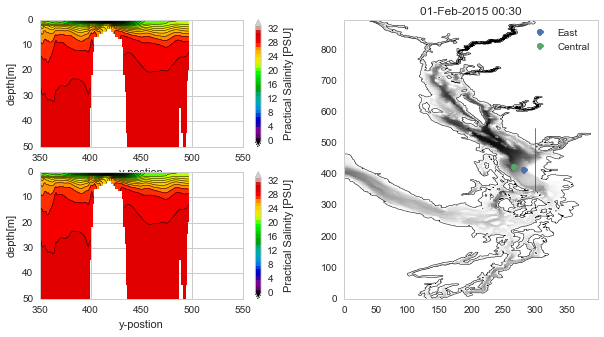

In [17]:
smin, smax, dels = 0, 34, 1
cs = np.arange(smin,smax)
cmap=plt.get_cmap('spectral')
st=5

fig= plt.figure( figsize=(10, 5))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,3)
axm = fig.add_subplot(1,2,2)
t=0

mesh = internal_tide(0)
cbar = plt.colorbar(mesh, ax=ax1)
cbar.set_label('Practical Salinity [PSU]')
cbar = plt.colorbar(mesh, ax=ax2)
cbar.set_label('Practical Salinity [PSU]')

viz_tools.plot_coastline(axm,bathy)
axm.pcolormesh(bathy.variables['Bathymetry'][:])
axm.plot([ist,ist], [jst,jen],'r')
axm.plot([ien,ien], [jst,jen],'r')
axm.plot(SITES['VENUS']['East']['i'], SITES['VENUS']['East']['j'], 'o',label='East')
axm.plot(SITES['VENUS']['Central']['i'], SITES['VENUS']['Central']['j'],'o',label='Central')
axm.legend(loc=0)

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str

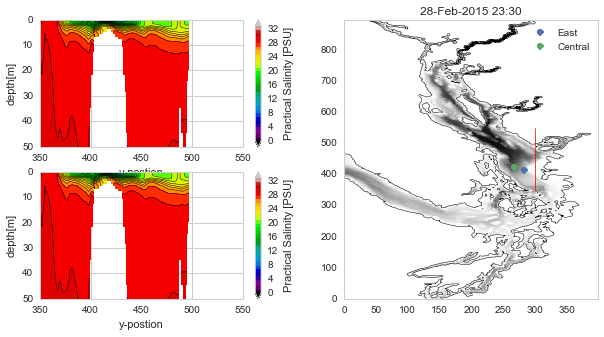

In [18]:
#Setting up first frame and static content
fig= plt.figure( figsize=(10, 5))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,3)
axm = fig.add_subplot(1,2,2)

mesh = internal_tide(0)
cbar = plt.colorbar(mesh, ax=ax1)
cbar.set_label('Practical Salinity [PSU]')
cbar = plt.colorbar(mesh, ax=ax2)
cbar.set_label('Practical Salinity [PSU]')

viz_tools.plot_coastline(axm,bathy)
axm.pcolormesh(bathy.variables['Bathymetry'][:])
axm.plot([ist,ist], [jst,jen],'r')
axm.plot([ien,ien], [jst,jen],'r')
axm.plot(SITES['VENUS']['East']['i'], SITES['VENUS']['East']['j'], 'o',label='East')
axm.plot(SITES['VENUS']['Central']['i'], SITES['VENUS']['Central']['j'],'o',label='Central')
axm.legend(loc=0)

#frmaes
framess=np.arange(1,sal.shape[0])

#The animation function    
anim = animation.FuncAnimation(fig, internal_tide,frames=framess,  blit=True, repeat=False)

#A line that makes it all work
mywriter = animation.FFMpegWriter( fps=3, bitrate=10000)

#Save in current folder
anim.save('internal_tide-banks-feb2015.mp4',writer=mywriter)